In [13]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np


# #############################################################################
# Get sample data
iris = datasets.load_iris()
X = iris.data[:, :5] #use 5 features

# #############################################################################
# Print to file to run in Urerf

with open('outTestMat.txt','wb') as f:
    for line in X:
        np.savetxt(f, line, fmt='%.2f')
print("Feature matrix of shape", X.shape, "outputted. Run Urerf in R now.")



Feature matrix of shape (150, 4) outputted. Run Urerf in R now.


In [27]:
## Load similarity matrix from Urerf
matrix = open('inTestMat.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)


# #############################################################################
# Compute Affinity Propagation

#uncomment for synthetic input similarity matrix
#inputMat = np.matrix([[.5,.2,.1,.1,.1,.9],[.1,.5,.1,.1,.8,.1],[.1,.1,.5,.9,.1,.1], [.1,.1,.8,.5,.1,.1], [.1,.9,.1,.1,.5,.1], [.8,.1,.1,.1,.1,.5,]])

af = AffinityPropagation(preference=-50).fit(inputMat)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)


## Sort similarity matrix based on clusters
#create a dictionary of labels and flowers
nodeDict = dict(enumerate(labels))
#sort the flowers so that they are grouped by cluster label
s = sorted(nodeDict, key=nodeDict.get)
#create a sorted similarity matrix
sortedSimMat = np.empty((len(s), len(s)))
for i in range(0, len(s)):
    node = s[i]
    for j in range(0, len(s)):
        sortedSimMat[i][j] = inputMat[node, j]



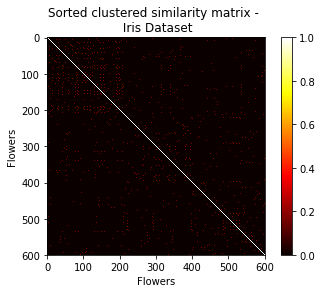

In [30]:
#create a heat map of the sorted similarity matrix
plt.figure(1)
im = plt.imshow(sortedSimMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Sorted clustered similarity matrix - \n Iris Dataset")
plt.show()

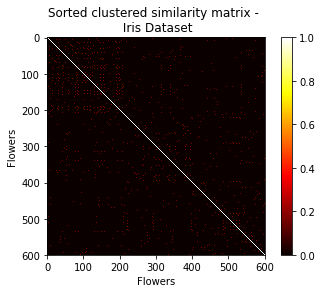

In [31]:
#create a heat map of the sorted similarity matrix
plt.figure(2)
im = plt.imshow(inputMat, cmap='hot', interpolation='nearest')
cbar = plt.colorbar(im) 
plt.xlabel('Flowers')
plt.ylabel('Flowers')
plt.title("Sorted clustered similarity matrix - \n Iris Dataset")
plt.show()